In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix


In [9]:
data = pd.read_csv('framingham.csv')

data.dropna(inplace=True)

# Rozdělení dat na příznaky (X) a cílovou proměnnou (y)
X = data.drop('TenYearCHD', axis=1)
y = data['TenYearCHD']

# Rozdělení dat na trénovací a testovací soubory
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializace a trénink modelu logistické regrese
model = LogisticRegression()
model.fit(X_train, y_train)

# Predikce na testovacích datech
y_pred = model.predict(X_test)

# Vyhodnocení přesnosti modelu
accuracy = accuracy_score(y_test, y_pred)
print("Přesnost modelu:", accuracy)

Přesnost modelu: 0.8413855970829535


c:\Users\bruli\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


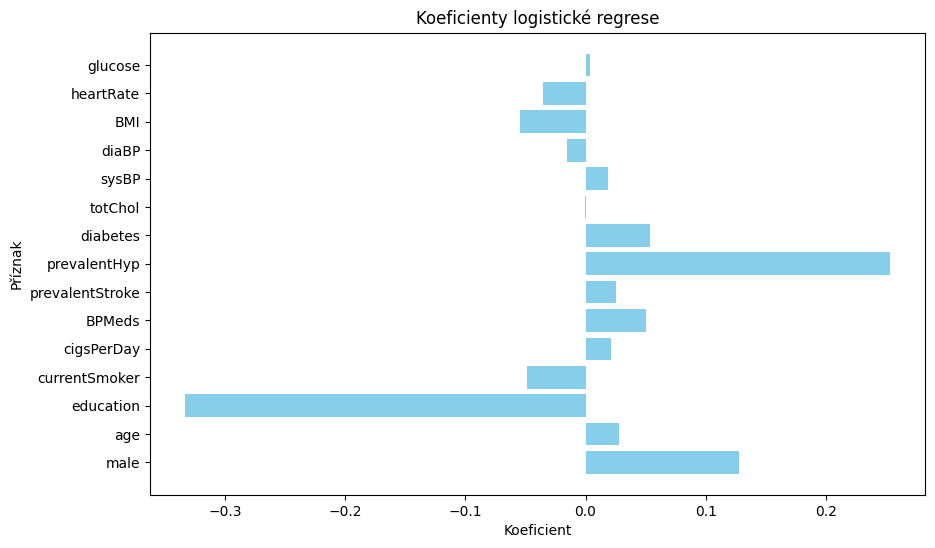

In [4]:
coefficients = model.coef_[0]

# Extrahování názvů příznaků
feature_names = X.columns

# Vytvoření sloupcového grafu pro vizualizaci koeficientů
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients, color='skyblue')
plt.xlabel('Koeficient')
plt.ylabel('Příznak')
plt.title('Koeficienty logistické regrese')
plt.show()

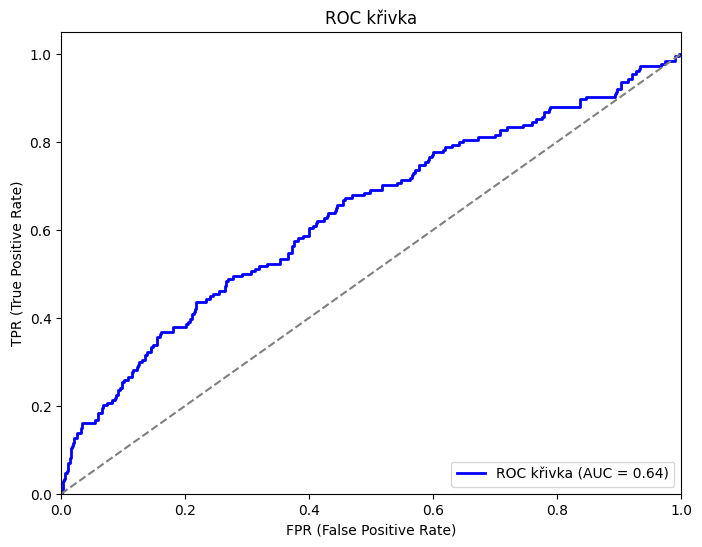

In [10]:
# Predikce pravděpodobností tříd na testovacích datech
y_probs = model.predict_proba(X_test)
y_probs = y_probs[:, 1]  # Pravděpodobnost pro třídu 1 (CHD)

# Výpočet ROC křivky
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Výpočet plochy pod ROC křivkou (AUC)
auc = roc_auc_score(y_test, y_probs)

# Vykreslení ROC křivky
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC křivka (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR (False Positive Rate)')
plt.ylabel('TPR (True Positive Rate)')
plt.title('ROC křivka')
plt.legend(loc="lower right")
plt.show()